In [ ]:
"""
1. 문제 정의
  - 로이터 뉴스를 46개의 상호 배타적인 토픽으로 분류하는 단일 레이블 다중 분류 문제..
2. 데이터 확보
  - keras reuters dataset을 사용합니다.
3. 데이터 특징 추출
4. 데이터 전처리
5. 모델 비교
6. 모델 준비
7. 모델 학습
8. 모델 평가
9. 모델 튜닝
10. 모델 서빙

colab : https://colab.research.google.com/drive/1BtECikBC4YY5llUdRFWYSSporDPu4YiA?usp=sharing
https://colab.research.google.com/drive/159NPdnm-TG47BIfgunwx3k6gyzMCPN9a?usp=sharing
https://colab.research.google.com/drive/18sObwceAej2mQHNEPJ9DqVuZMw7faSmA?usp=sharing"""

In [27]:
# 데이터 확보
from tensorflow.keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

In [28]:
max([max(sequence) for sequence in train_data])

9999

In [29]:
# 각 row는 단어 index로 구성
train_data[:5]

array([list([1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]),
       list([1, 3267, 699, 3434, 2295, 56, 2, 7511, 9, 56, 3906, 1073, 81, 5, 1198, 57, 366, 737, 132, 20, 4093, 7, 2, 49, 2295, 2, 1037, 3267, 699, 3434, 8, 7, 10, 241, 16, 855, 129, 231, 783, 5, 4, 587, 2295, 2, 2, 775, 7, 48, 34, 191, 44, 35, 1795, 505, 17, 12]),
       list([1, 53, 12, 284, 15, 14, 272, 26, 53, 959, 32, 818, 15, 14, 272, 26, 39, 684, 70, 11, 14, 12, 3886, 18, 180, 183, 187, 70, 11, 14, 102, 32, 11, 29, 53, 44, 704, 15, 14, 19, 758, 15, 53, 959, 47, 1013, 15, 14, 19, 132, 15, 39, 965, 32, 11, 14, 147, 72, 11, 180, 183, 187, 44, 11, 14, 102, 19, 11, 123, 186, 90, 67, 960, 4, 78, 13, 68, 467, 511, 110,

In [30]:
# decoding
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])
decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [31]:
# 10000개의 차원으로 Multi-hot 인코딩
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
x_train.shape

(8982, 10000)

In [32]:
# Label incoding
# Label이 해당되는 곳만 1로 할당, 나머지는 0으로 할당

def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

y_train = to_one_hot(train_labels)
y_test = to_one_hot(test_labels)
y_train.shape

(8982, 46)

In [33]:
# 모델 준비
# 마지막 Dense 층의 크기가 46인 이유는 46차원의 벡터를 출력한다는 뜻이다.

from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential([
        layers.Dense(64, activation='relu', input_shape=(10000,)),
        layers.Dense(64, activation='relu'),
        layers.Dense(46, activation='softmax')
    ])

In [34]:
# 모델 컴파일
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [35]:
# 훈련 및 검증 데이터 준비

x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = y_train[:1000]
partial_y_train = y_train[1000:]

In [36]:
# 모델 훈련
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))
history_dict = history.history
history_dict.keys()

Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 83ms/step - accuracy: 0.4164 - loss: 3.2907 - val_accuracy: 0.6170 - val_loss: 1.8512
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 88ms/step - accuracy: 0.6717 - loss: 1.6468 - val_accuracy: 0.6940 - val_loss: 1.3813
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 89ms/step - accuracy: 0.7297 - loss: 1.2554 - val_accuracy: 0.7280 - val_loss: 1.2020
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.7728 - loss: 1.0150 - val_accuracy: 0.7450 - val_loss: 1.1063
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - accuracy: 0.8148 - loss: 0.8517 - val_accuracy: 0.7800 - val_loss: 1.0132
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - accuracy: 0.8487 - loss: 0.7210 - val_accuracy: 0.7980 - val_loss: 0.9730
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.8718 - loss: 0.6141 - val_accuracy: 0.8020 - val_loss: 0.9256
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.8959 - loss: 0.5123 - val_accuracy: 0.8080 - v

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

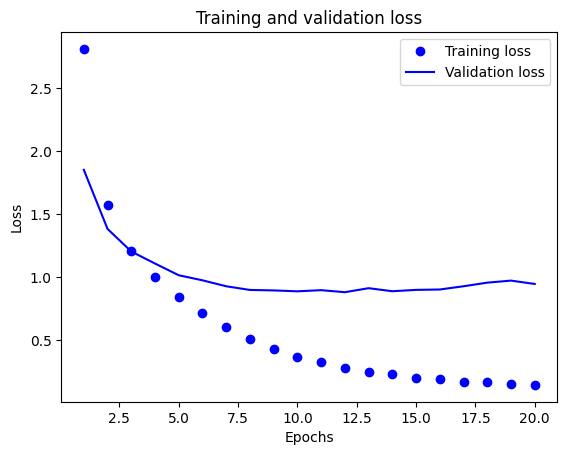

In [37]:
# 훈련 및 검증 손실 시각화

import matplotlib.pyplot as plt

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

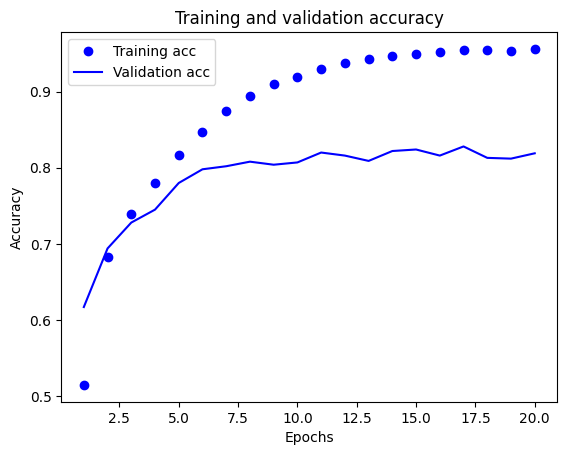

In [38]:
# 훈련 및 검증 정확도 시각화

plt.clf()
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [39]:
# 모델 재학습
model = models.Sequential([
        layers.Dense(64, activation='relu', input_shape=(10000,)),
        layers.Dense(64, activation='relu'),
        layers.Dense(46, activation='softmax')
    ])
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=9,
          batch_size=512,
          validation_data=(x_val, y_val))
results = model.evaluate(x_test, y_test)
results

Epoch 1/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step - accuracy: 0.4192 - loss: 3.0966 - val_accuracy: 0.6200 - val_loss: 1.7371
Epoch 2/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.6732 - loss: 1.5495 - val_accuracy: 0.6980 - val_loss: 1.3305
Epoch 3/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 73ms/step - accuracy: 0.7502 - loss: 1.1439 - val_accuracy: 0.7410 - val_loss: 1.1656
Epoch 4/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 81ms/step - accuracy: 0.8003 - loss: 0.9429 - val_accuracy: 0.7730 - val_loss: 1.0632
Epoch 5/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - accuracy: 0.8358 - loss: 0.7582 - val_accuracy: 0.7890 - val_loss: 1.0036
Epoch 6/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - accuracy: 0.8532 - loss: 0.6578 - val_accuracy: 0.7970 - val_loss: 0.9544
Epoch 7/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.8816 - loss: 0.5416 - val_accuracy: 0.7970 - val_loss: 0.9280
Epoch 8/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.9054 - loss: 0.4618 - val_accuracy: 0.8050 - val_loss:

[0.9801813364028931, 0.7782725095748901]

In [40]:
# 마지막 출력이 46차원인 경우, 중간에 낮은 차원을 두면 병목이 발생한다.

model = models.Sequential([
        layers.Dense(64, activation='relu', input_shape=(10000,)),
        layers.Dense(4, activation='relu'),
        layers.Dense(46, activation='softmax')
    ])
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=512,
          validation_data=(x_val, y_val))
results = model.evaluate(x_test, y_test)
results

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - accuracy: 0.0025 - loss: 3.6073 - val_accuracy: 0.0140 - val_loss: 3.0716
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - accuracy: 0.0882 - loss: 2.9084 - val_accuracy: 0.4340 - val_loss: 2.5184
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.5194 - loss: 2.3295 - val_accuracy: 0.6030 - val_loss: 2.0796
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - accuracy: 0.6205 - loss: 1.9152 - val_accuracy: 0.6230 - val_loss: 1.7865
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.6377 - loss: 1.6246 - val_accuracy: 0.6390 - val_loss: 1.6124
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 74ms/step - accuracy: 0.6443 - loss: 1.4616 - val_accuracy: 0.6400 - val_loss: 1.5112
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 79ms/step - accuracy: 0.6534 - loss: 1.3327 - val_accuracy: 0.6430 - val_loss: 1.4338
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.6738 - loss: 1.2332 - val_accuracy: 0.6460 - v

[1.3030235767364502, 0.6985752582550049]